In [1]:
import mne, sys, math
sys.path.append('..')
from utils.coco_data_handler import COCODataHandler
from utils.epoch_data_reader import *

In [10]:
raw = mne.io.read_raw_fif("S:\\PolySecLabProjects\\eeg-image-decode\\data\\all-joined-1\\eeg\\preprocessed\\ground-truth\\subj01_session1_eeg.fif")
raw

Opening raw data file S:\PolySecLabProjects\eeg-image-decode\data\all-joined-1\eeg\preprocessed\ground-truth\subj01_session1_eeg.fif...
    Range : 1121 ... 1777926 =      2.189 ...  3472.512 secs
Ready.


<Raw | subj01_session1_eeg.fif, 65 x 1776806 (3470.3 s), ~81 KiB, data not loaded>

Fitted sphere radius:         96.2 mm
Origin head coordinates:      -0.8 14.4 43.1 mm
Origin device coordinates:    -0.8 14.4 43.1 mm
Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


s:\PolySecLabProjects\eeg-image-decode\env\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


s:\PolySecLabProjects\eeg-image-decode\env\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


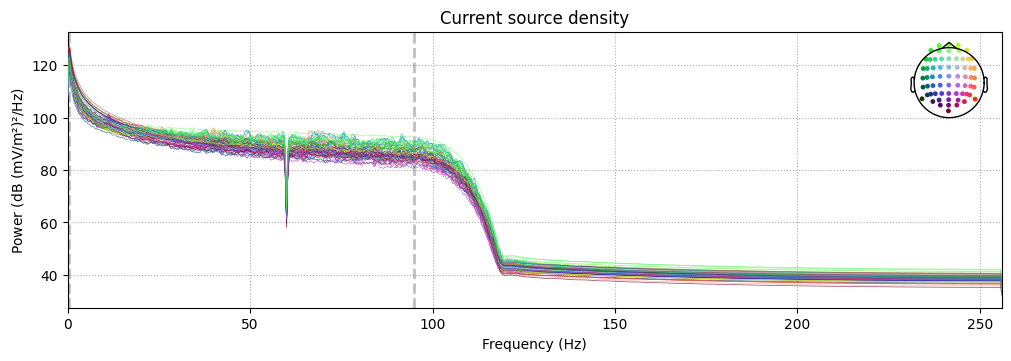

In [ ]:
raw_csd = mne.preprocessing.compute_current_source_density(raw.load_data())

Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


s:\PolySecLabProjects\eeg-image-decode\env\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


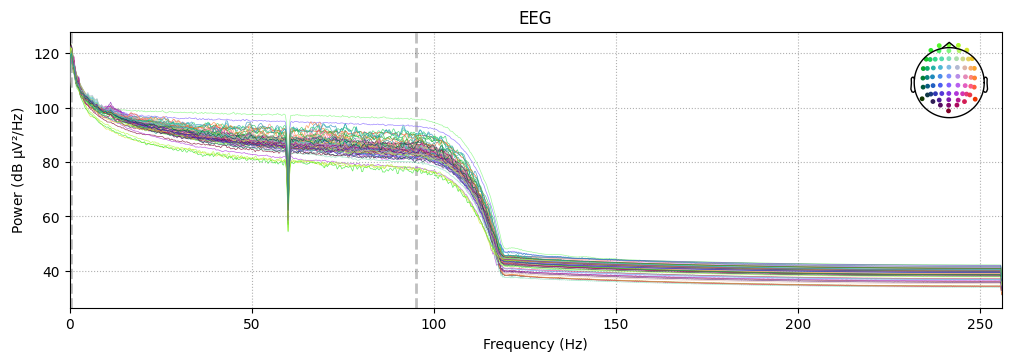

In [16]:
raw.compute_psd().plot(show=True)

In [17]:
event_epochs, one_hot_encodings = epoch_around_events(raw, 0.05, 0.6)
event_epochs.get_data().shape, one_hot_encodings.shape

3839 events found on stim channel Status
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234

((3838, 64, 338), (3838, 12))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.


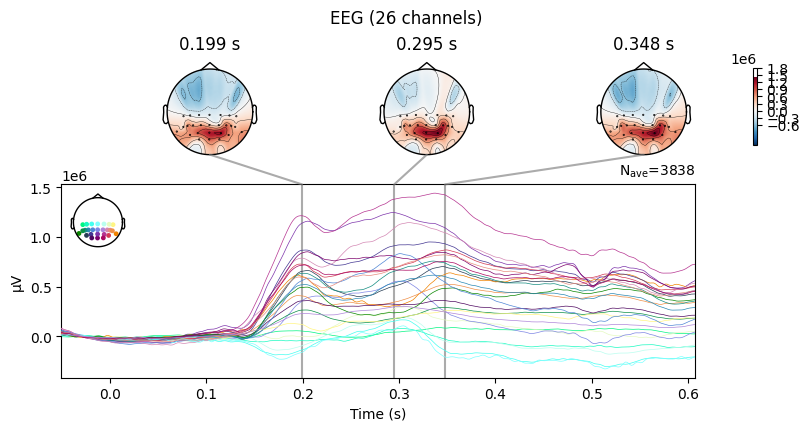

In [20]:
evoked = event_epochs.copy().pick_channels([ch for ch in event_epochs.info['ch_names'] if ch.startswith('P') or ch.startswith('O') or ch.startswith('PO') or ch.startswith('CP')]).average()
evoked.plot_joint(show=False)

In [5]:
fixed_length_epochs, _ = epoch_fixed_lengths(raw, 7)
fixed_length_epochs.get_data().shape

Not setting metadata
495 matching events found
No baseline correction applied
0 projection items activated
Loading data for 495 events and 3584 original time points ...


0 bad epochs dropped


(495, 64, 3584)

In [5]:
reconstructed_raw = reconstruct_raw_from_fixed_length_epochs(fixed_length_epochs, raw)
reconstructed_raw

Reading 0 ... 1783343  =      0.000 ...  3483.092 secs...
Fitting ICA to data using 64 channels (please be patient, this may take a while)


s:\PolySecLabProjects\eeg-image-decode\code\notebooks\..\utils\epoch_manipulation_helpers.py:44: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(fixed_length_epochs)


Selecting by non-zero PCA components: 62 components
Fitting ICA took 192.4s.
Applying ICA to Raw instance
    Transforming to ICA space (62 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


<Raw | subj01_session2_eeg.fif, 65 x 1781249 (3479.0 s), ~883.4 MiB, data loaded>

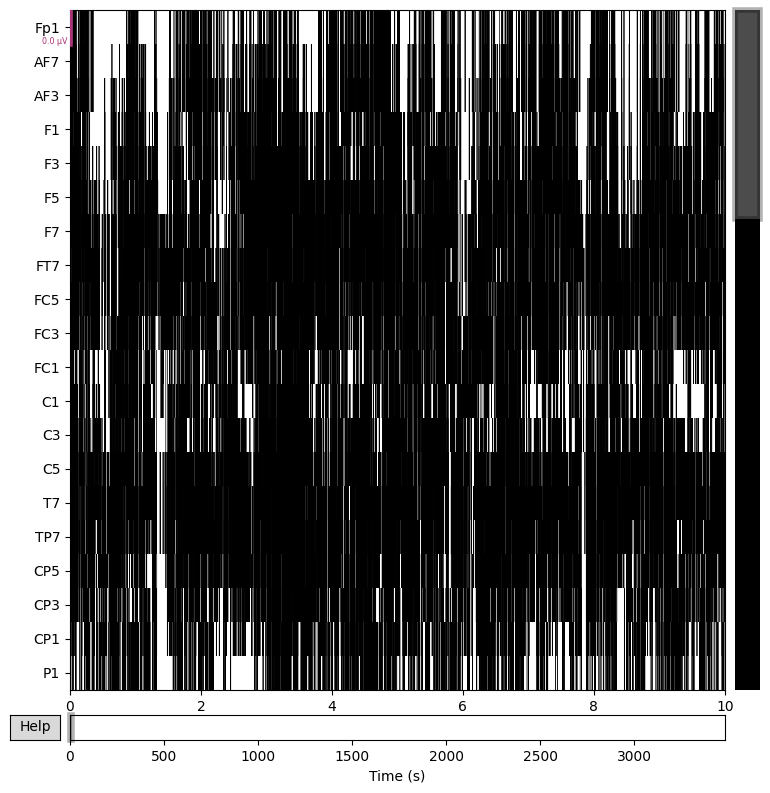

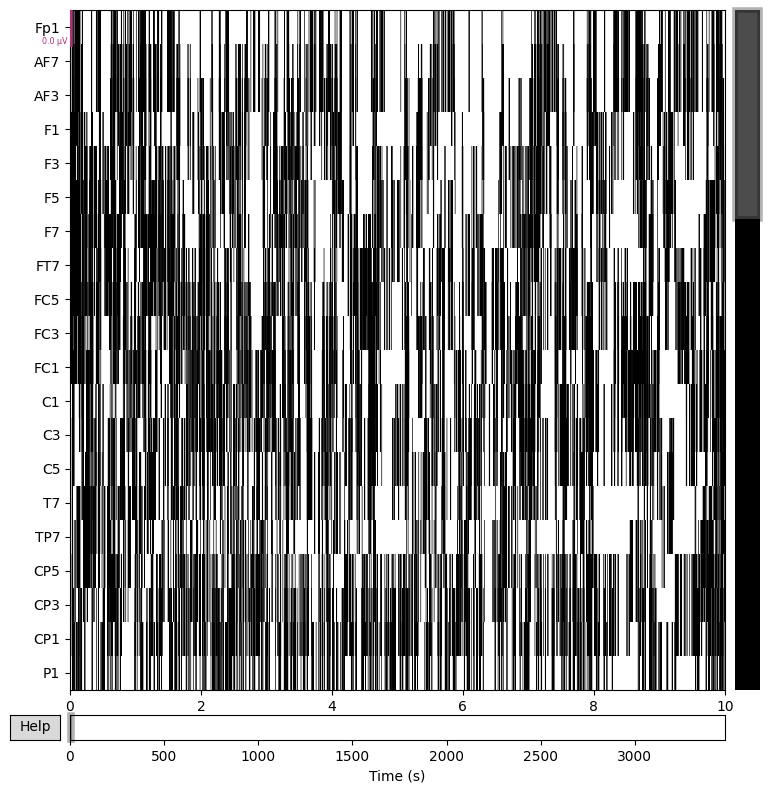

In [9]:
fig1, fig2 = raw.plot(scalings=1e-9), reconstructed_raw.plot(scalings=1e-9)

In [2]:
import mne, sys, math
sys.path.append('..')
from utils.coco_data_handler import COCODataHandler
from utils.epoch_data_reader import *

In [2]:
dataset = EpochDataReader(subject_session_id="subj01_session1", epoch_type="fixed_length", fixed_length_duration=7)

Opening raw data file s:\PolySecLabProjects\eeg-image-decode\code\utils\..\..\data\all-joined-1\eeg\preprocessed\ground-truth\subj01_session1_eeg.fif...
Isotrak not found
    Range : 1121 ... 1777926 =      2.189 ...  3472.512 secs
Ready.
Not setting metadata
495 matching events found
No baseline correction applied
0 projection items activated
Loading data for 495 events and 3584 original time points ...
0 bad epochs dropped


In [3]:
len(dataset)

495

In [5]:
dataset.set_split_type("val")

In [4]:
dataset[0].shape

(64, 3584)

In [5]:
dataset2 = EpochDataReader(channel_names=['AF7', 'Fp1'])

Creating new group: cross/ground-truth/AF7-Fp1/original/around_evoked/0.65/70_25_5/97
Opening raw data file s:\PolySecLabProjects\eeg-image-decode\code\utils\..\..\data\all-joined-1\eeg\preprocessed\ground-truth\subj01_session1_eeg.fif...
Isotrak not found
    Range : 1121 ... 1777926 =      2.189 ...  3472.512 secs
Ready.
Opening raw data file s:\PolySecLabProjects\eeg-image-decode\code\utils\..\..\data\all-joined-1\eeg\preprocessed\ground-truth\subj01_session1_eeg.fif...
Isotrak not found
    Range : 1121 ... 1777926 =      2.189 ...  3472.512 secs
Ready.
3839 events found on stim channel Status
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  9

In [6]:
len(dataset2)

45968

In [7]:
dataset2[0][0].shape

(2, 338)

In [3]:
from torch.utils.data import DataLoader

In [4]:
lo_res_dataset = EpochDataReader(split_type="train")
hi_res_dataset = EpochDataReader(split_type="train")

Creating new group: cross/ground-truth/all/512/around_evoked/0.65/70_25_5/97
Opening raw data file s:\PolySecLabProjects\eeg-image-decode\code\utils\..\..\data\all-joined-1\eeg\preprocessed\ground-truth\subj01_session1_eeg.fif...
    Range : 1121 ... 1777926 =      2.189 ...  3472.512 secs
Ready.
Opening raw data file s:\PolySecLabProjects\eeg-image-decode\code\utils\..\..\data\all-joined-1\eeg\preprocessed\ground-truth\subj01_session1_eeg.fif...
    Range : 1121 ... 1777926 =      2.189 ...  3472.512 secs
Ready.
3839 events found on stim channel Status
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106

In [5]:
lo_res_loader = DataLoader(
    lo_res_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

hi_res_loader = DataLoader(
    hi_res_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

In [8]:
for i, (lo_res_batch, hi_res_batch) in enumerate(zip(lo_res_loader, hi_res_loader)):
    print(i, len(lo_res_batch), len(hi_res_batch))
    break

0 2 2


In [13]:
dataset.set_split_type("val")

In [14]:
len(train_loader.dataset)

1485

In [ ]:
for batch in train_loader:
    print(batch)
    pass

tensor([[[-0.0914, -0.0511, -0.0152,  ...,  0.4067,  0.3862,  0.3757],
         [ 0.0892,  0.1266,  0.1573,  ...,  0.0366,  0.0437,  0.0473],
         [ 0.3062,  0.3778,  0.4850,  ..., -0.4775, -0.5187, -0.5383],
         ...,
         [-0.1897, -0.2990, -0.3272,  ..., -1.2232, -1.2929, -1.3548],
         [ 0.3902,  0.1772, -0.0405,  ...,  3.9756,  3.8887,  3.8374],
         [ 0.3470,  0.3473,  0.4248,  ..., -0.4155, -0.3618, -0.2723]],

        [[-0.3790, -0.1195, -0.0174,  ...,  0.8610,  0.9287,  0.9953],
         [ 0.1649,  0.2682,  0.2958,  ...,  0.3259,  0.3515,  0.4186],
         [-0.5977, -0.1797, -0.0051,  ...,  0.4632,  0.5100,  0.6278],
         ...,
         [ 0.7563, -0.0814, -0.2576,  ..., -0.6135, -0.8470, -1.0212],
         [ 0.2461, -0.2660, -0.3288,  ..., -0.9596, -1.0674, -1.1604],
         [ 0.0908, -0.8077, -0.9856,  ..., -0.0545, -0.2198, -0.4261]],

        [[ 0.1195,  0.1410,  0.1573,  ...,  0.0623,  0.1149,  0.1921],
         [ 0.1048,  0.0687,  0.0821,  ..., -0

KeyboardInterrupt: 

In [ ]:
# progress_bar = tqdm(, desc=f"Running model on validation set...", leave=False)
for lo_res_batch, hi_res_batch in zip(lo_res_loader, hi_res_loader):
    if len(lo_res) == 2 and len(hi_res) == 2:
        lo_res = lo_res_batch[0]
        hi_res = hi_res_batch[0]
    else:
        lo_res = lo_res_batch
        hi_res = hi_res_batch

NameError: name 'lo_res' is not defined